In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,classification_report
from sklearn import tree
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')

In [4]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [15]:
features=data.drop('Price',axis=1)

In [16]:
features.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,Diesel,90,0,2000,3,4,5,1165
1,23,72937,Diesel,90,0,2000,3,4,5,1165
2,24,41711,Diesel,90,0,2000,3,4,5,1165
3,26,48000,Diesel,90,0,2000,3,4,5,1165
4,30,38500,Diesel,90,0,2000,3,4,5,1170


In [17]:
target=data['Price']

In [18]:
target.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [19]:
features.shape

(1435, 10)

In [10]:
features.isnull().sum()

Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
target.isnull().sum()

0

In [12]:
features.duplicated().sum()

2

In [13]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [20]:
LR=LinearRegression()

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.80,random_state=20)

In [32]:
xtrain.shape

(1148, 10)

In [23]:
lab=LabelEncoder()

In [24]:
features['Fuel_Type']=lab.fit_transform(features['Fuel_Type'])

In [25]:
features.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170


In [26]:
std=StandardScaler()

In [27]:
features1=std.fit_transform(features)

In [28]:
features=pd.DataFrame(features1,columns=features.columns)

In [29]:
features.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.777268,-0.575958,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
1,-1.777268,0.116474,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
2,-1.723380,-0.716707,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
3,-1.615603,-0.548902,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.774964
4,-1.400049,-0.802384,-2.343149,-0.767351,-0.242983,0.998113,-1.084443,0.0,-0.140475,1.870688


In [33]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [34]:
LR.score(xtest,ytest)

0.8509453620158254

In [35]:
ypred=LR.predict(xtest)

In [36]:
ypred

array([17694.37046039,  7737.24546969,  6508.94305358, 12914.03385246,
       13054.05973238, 11423.70331881, 14964.32659686,  8710.25820232,
       13000.8760175 , 10299.22159533,  6510.09624668,  7898.79561144,
       18271.97114206,  8123.40009004, 17484.58863829,  6406.0026605 ,
        7460.51152272, 13337.70833533, 14609.95059353,  7675.12892019,
       13399.64549949, 11207.57683864,  5606.60909351,  5339.73009714,
       10621.72719297,  6174.43217936,  7432.58689775,  7349.71184985,
        8187.50409854, 10672.37128451, 12272.81648092,  7621.86472324,
       11465.3014432 ,  8026.20771723, 13374.86474128, 13220.18278797,
       10179.58754734, 12767.38234489,  7540.97647815,  6496.41936026,
        9031.11069513,  8237.96391652, 10383.16213568,  9488.09651756,
       10734.5498176 , 18455.53633993, 20424.01425219, 15332.15525844,
        8822.83461961,  9861.32775449,  9315.19903597, 13199.39693553,
       12456.30370248, 10239.68846714, 12195.81546336, 11432.117287  ,
      

<Axes: xlabel='Price'>

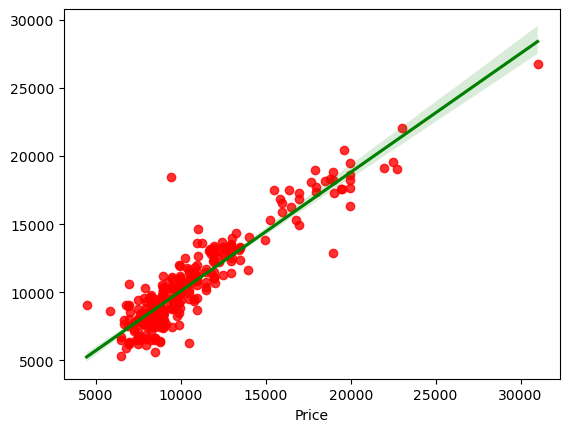

In [37]:
sns.regplot(data=data,x=ytest,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'green'})

## 2nd model

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.8,random_state=10)

In [102]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [103]:
LR.score(xtest,ytest)

0.865788206381325

In [104]:
ypred=LR.predict(xtest)

<Axes: xlabel='Price'>

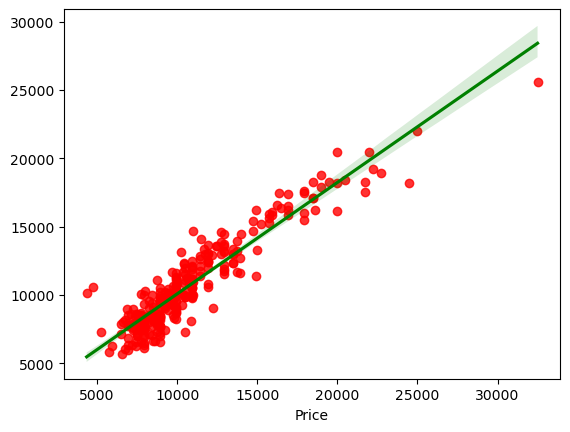

In [105]:
sns.regplot(data=data,x=ytest,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'green'})

## 3rd model

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,train_size=0.8,random_state=30)

In [110]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [111]:
LR.score(xtest,ytest)

0.7888001945802131

In [112]:
ypred=LR.predict(xtest)

<Axes: xlabel='Price'>

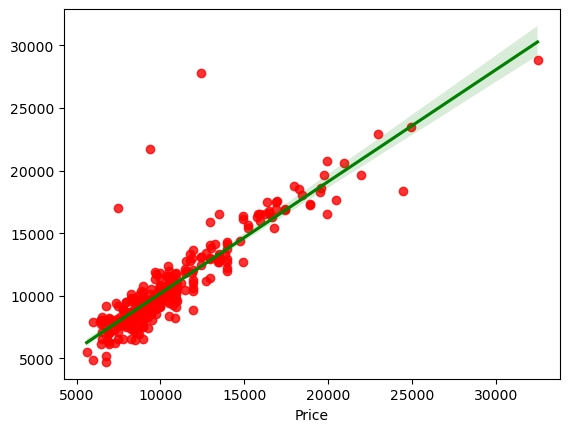

In [113]:
sns.regplot(data=data,x=ytest,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'green'})

## The second model had highest accuracy of 86%

## Evaluation Metrics

#### Mean Absolute Error 

In [38]:
ypred


array([17694.37046039,  7737.24546969,  6508.94305358, 12914.03385246,
       13054.05973238, 11423.70331881, 14964.32659686,  8710.25820232,
       13000.8760175 , 10299.22159533,  6510.09624668,  7898.79561144,
       18271.97114206,  8123.40009004, 17484.58863829,  6406.0026605 ,
        7460.51152272, 13337.70833533, 14609.95059353,  7675.12892019,
       13399.64549949, 11207.57683864,  5606.60909351,  5339.73009714,
       10621.72719297,  6174.43217936,  7432.58689775,  7349.71184985,
        8187.50409854, 10672.37128451, 12272.81648092,  7621.86472324,
       11465.3014432 ,  8026.20771723, 13374.86474128, 13220.18278797,
       10179.58754734, 12767.38234489,  7540.97647815,  6496.41936026,
        9031.11069513,  8237.96391652, 10383.16213568,  9488.09651756,
       10734.5498176 , 18455.53633993, 20424.01425219, 15332.15525844,
        8822.83461961,  9861.32775449,  9315.19903597, 13199.39693553,
       12456.30370248, 10239.68846714, 12195.81546336, 11432.117287  ,
      

In [39]:
ytest

83      17950
1129     7950
1368     8250
522     18950
318     11950
        ...  
1378     7750
244     13500
280     12950
1398     8950
251     11750
Name: Price, Length: 287, dtype: int64

In [41]:
mae = np.mean(np.abs(ytest - ypred))

In [42]:
mae

1006.6856334562672

In [45]:
# From the mae value we can infer that the price differs by 1006 

## Mean Squared value

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mse=mean_squared_error(ytest,ypred)

In [49]:
mse

1973183.6205006484

In [50]:
# From the MSE value we can see that the actual value and predicted value has more difference

# Root mean square error

In [51]:
rmse=mse**0.5

In [52]:
rmse

1404.7005447783697

In [53]:
# From the RMSE value we can see that the actual value and predicted value has a difference of 1404

In [54]:
from sklearn.metrics import r2_score

In [55]:
rsquare=r2_score(ytest,ypred)
rsquare

0.8509453620158254

In [56]:
# Higher the R2 value the model is good so our model is good fit

#Adjusted R2 value

In [59]:
l=len(ytest)
k=10-1

In [60]:
ar2=1-(1-rsquare)*(l-1)/(l-k-1)

In [61]:
ar2

0.8461024315398052

With the adjusted R2 value we can conclude that the model is performing good

In [63]:
from sklearn.linear_model import Lasso

In [64]:
lasso=Lasso(alpha=0.1)

In [65]:
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [66]:
ypred2=lasso.predict(xtest)

In [67]:
ypred2

array([17693.50079887,  7737.17136026,  6509.01165045, 12913.6366247 ,
       13053.98883833, 11423.80209652, 14963.88980923,  8710.71770971,
       13000.99832757, 10298.8189673 ,  6510.2990878 ,  7898.82946928,
       18271.72385261,  8123.5738563 , 17484.41832532,  6406.30042591,
        7460.68633588, 13337.63123728, 14609.27753702,  7675.30328711,
       13399.63173799, 11207.70966699,  5607.0739873 ,  5340.11779135,
       10621.68901403,  6175.22765735,  7432.85930068,  7350.17291803,
        8187.54985514, 10672.44878908, 12272.94631158,  7621.89433564,
       11465.27345867,  8026.1170735 , 13374.96353973, 13220.27921511,
       10179.95612603, 12767.29422136,  7541.25493587,  6496.457874  ,
        9031.61212176,  8237.45836776, 10383.16239835,  9488.29872141,
       10734.69716649, 18453.09113439, 20422.78637147, 15331.98783775,
        8823.26608431,  9861.36180738,  9315.1192259 , 13199.4967804 ,
       12456.18610945, 10239.15434156, 12195.89764082, 11432.21619371,
      

In [68]:
rsqul=r2_score(ytest,ypred2)
rsqul

0.8509563016914294

the lasso model is being a good fit

<Axes: >

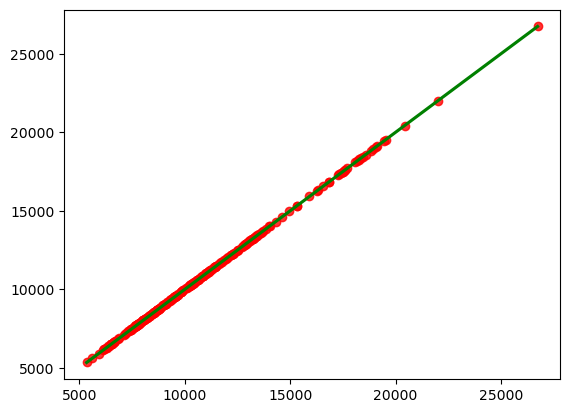

In [71]:
sns.regplot(data=data,x=ypred2,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'green'})

Here we can see that lasso model and linear regression model provide almost same prediction

From the model we can infer that the mode is 85% accurate and the error is 15% the lasso model also gives us 85% accuracy